In [7]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)
import seaborn as sns #for visualization
from sklearn.preprocessing import MinMaxScaler # for Scalling 

# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Split data into train and test sets
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFECV # For improve model building
from sklearn.model_selection import StratifiedKFold # For improve model building

import plotly.express as px #for visualization
import matplotlib.pyplot as plt #for visualization 
from sklearn import metrics

import joblib # for Saving best model 
from sklearn.model_selection import RepeatedStratifiedKFold # for define evaluation
from scipy.stats import loguniform # for define search space
from sklearn.model_selection import RandomizedSearchCV # define search

In [2]:
#Read the dataset
data_df = pd.read_csv("../data/hr_data.csv")

In [3]:
data_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Explore Numeric features

In [4]:
data_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
data_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# data_df['TotalCharges'] = pd.to_numeric(data_df['TotalCharges'],errors='coerce')
#Fill the missing values with with the median/ mode value
# data_df['Age'] = data_df['Age'].fillna(data_df['Age'].median())
# data_df['Age'] = data_df['Age'].fillna(data_df['Age'].median())
# data_df['Embarked'] = data_df['Embarked'].fillna(data_df['Embarked'].mode()[0])

In [6]:
data_df.apply(lambda x: x.unique().shape[0]).sort_values(ascending=True)

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

### Data preprocessing

In [7]:
# These columns are not useful as the feature us used for identification of employees. 
data_df.drop(['Over18', 'StandardHours', 'EmployeeCount', 'EmployeeNumber'],axis=1,inplace = True)

# Encode categorical features

#Defining the map function
#def binary_map(feature):
#    return feature.map({'Yes':1, 'No':0})

## Encoding target feature
# data_df['Churn'] = data_df[['Churn']].apply(binary_map)


#Encoding other binary category
# binary_list = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
# data_df[binary_list] = data_df[binary_list].apply(binary_map)
# employee's education level
data_df['Education'] = data_df['Education'].apply(lambda x: 'Bellow_College' if x == 1 
                                                          else 'College' if x == 2 
                                                          else 'Bachelor' if x == 3 
                                                          else 'Master' if x == 4 
                                                          else 'Doctor')

# how satisfied the employee is with the company's environment 
data_df['EnvironmentSatisfaction'] = data_df['EnvironmentSatisfaction'].apply(lambda x: 'Low' if x == 1 
                                                                                        else 'Medium' if x == 2 
                                                                                        else 'High' if x == 3 
                                                                                        else 'Very_High')

# how involved the employee feels with his/her job 
data_df['JobInvolvement'] = data_df['JobInvolvement'].apply(lambda x: 'Low' if x == 1
                                                                      else 'Medium' if x == 2 
                                                                      else 'High' if x == 3 
                                                                      else 'Very_High')

# employee's job level
data_df['JobLevel'] = data_df['JobLevel'].apply(lambda x: 'Junior' if x == 1
                                                                else 'Mid' if x == 2 
                                                                else 'Senior' if x == 3 
                                                                else 'Manager' if x ==4 
                                                                else 'Director')

# how satisfied the employee feels with his/her job
data_df['JobSatisfaction'] = data_df['JobSatisfaction'].apply(lambda x: 'Low' if x == 1
                                                                        else 'Medium' if x == 2
                                                                        else 'High' if x == 3 
                                                                        else 'Very_High')

# employee's performance rating 
data_df['PerformanceRating'] = data_df['PerformanceRating'].apply(lambda x: 'Low' if x == 1
                                                                            else 'Good' if x == 2
                                                                            else 'Excellent' if x == 3 
                                                                            else 'Outstanding')

# how satisfied the employee feels with the relationship with his/her manager
data_df['RelationshipSatisfaction'] = data_df['RelationshipSatisfaction'].apply(lambda x: 'Low' if x == 1
                                                                                          else 'Medium' if x == 2
                                                                                          else 'High' if x == 3 
                                                                                          else 'Very_High')

# how the employee feels about his/her work life balance
data_df['WorkLifeBalance'] = data_df['WorkLifeBalance'].apply(lambda x: 'Bad' if x == 1
                                                                          else 'Good' if x == 2
                                                                          else 'Better' if x == 3 
                                                                          else 'Best')


In [8]:
# saves the current data set state
data_df.to_csv('../data/hr_data_cleaned.csv', index=False)
data_df.sample()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
385,30,Yes,Travel_Frequently,464,Research & Development,4,Bachelor,Technical Degree,High,Male,40,High,Junior,Research Scientist,Very_High,Single,2285,3427,9,Yes,23,Outstanding,High,0,3,4,Better,1,0,0,0


In [9]:
# loads data set
data_df = pd.read_csv('../data/hr_data_cleaned.csv')
data_df.sample()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1161,38,No,Travel_Rarely,397,Research & Development,2,College,Medical,Very_High,Female,54,Medium,Senior,Manufacturing Director,High,Married,7756,14199,3,Yes,19,Excellent,Very_High,1,10,6,Best,5,4,0,2


In [10]:
# Encoding gender category
data_df['Gender'] = data_df['Gender'].map({'Male':1, 'Female':0})
data_df['Attrition'] = data_df['Attrition'].map({'Yes':1, 'No':0})
data_df['OverTime'] = data_df['OverTime'].map({'Yes':1, 'No':0})

In [11]:
#Encoding the other categoric features with more than two categories
data_df = pd.get_dummies(data_df, drop_first=True)

In [12]:
data_df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Gender,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_Bellow_College,Education_College,Education_Doctor,Education_Master,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very_High,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very_High,JobLevel_Junior,JobLevel_Manager,JobLevel_Mid,JobLevel_Senior,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very_High,MaritalStatus_Married,MaritalStatus_Single,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very_High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,41,1,1102,1,0,94,5993,19479,8,1,11,0,8,0,6,4,0,5,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0
1,49,0,279,8,1,61,5130,24907,1,0,23,1,10,3,10,7,1,7,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0
2,37,1,1373,2,1,92,2090,2396,6,1,15,0,7,3,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,33,0,1392,3,0,56,2909,23159,1,1,11,0,8,3,8,7,3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,27,0,591,2,1,40,3468,16632,9,0,12,1,6,3,2,2,2,2,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0


In [13]:
#feature scaling

sc = MinMaxScaler()
scaled = sc.fit_transform(data_df)

# gets the Data Frame version of numerical scaled for later manipulation
data_df_scaled = pd.DataFrame(scaled)

# renaming the columns of result Data Frame
data_df_scaled.columns = data_df.columns
data_df = data_df_scaled
data_df

,Age,Attrition,DailyRate,DistanceFromHome,Gender,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_Bellow_College,Education_College,Education_Doctor,Education_Master,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very_High,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very_High,JobLevel_Junior,JobLevel_Manager,JobLevel_Mid,JobLevel_Senior,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very_High,MaritalStatus_Married,MaritalStatus_Single,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very_High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,0.547619,1.0,0.715820,0.000000,0.0,0.914286,0.262454,0.698053,0.888889,1.0,0.000000,0.000000,0.200,0.000000,0.150,0.222222,0.000000,0.294118,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.738095,0.0,0.126700,0.250000,1.0,0.442857,0.217009,0.916001,0.111111,0.0,0.857143,0.333333,0.250,0.500000,0.250,0.388889,0.066667,0.411765,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.452381,1.0,0.909807,0.035714,1.0,0.885714,0.056925,0.012126,0.666667,1.0,0.285714,0.000000,0.175,0.500000,0.000,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.357143,0.0,0.923407,0.071429,0.0,0.371429,0.100053,0.845814,0.111111,1.0,0.000000,0.000000,0.200,0.500000,0.200,0.388889,0.200000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.0,0.350036,0.035714,1.0,0.142857,0.129489,0.583738,1.000000,0.0,0.071429,0.333333,0.150,0.500000,0.050,0.111111,0.133333,0.117647,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.0,0.559771,0.785714,1.0,0.157143,0.082254,0.409396,0.444444,0.0,0.428571,0.333333,0.425,0.500000,0.125,0.111111,0.000000,0.176471,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.500000,0.0,0.365784,0.178571,1.0,0.171429,0.472986,0.777474,0.444444,0.0,0.285714,0.333333,0.225,0.833333,0.175,0.388889,0.066667,0.411765,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1467,0.214286,0.0,0.037938,0.107143,1.0,0.814286,0.270300,0.123670,0.111111,1.0,0.642857,0.333333,0.150,0.000000,0.150,0.111111,0.000000,0.176471,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,

In [14]:
# saves the current data set state
data_df_scaled.to_csv('../data/hr_data_scaled.csv', index=False)
data_df_scaled.sample()

,Age,Attrition,DailyRate,DistanceFromHome,Gender,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_Bellow_College,Education_College,Education_Doctor,Education_Master,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very_High,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very_High,JobLevel_Junior,JobLevel_Manager,JobLevel_Mid,JobLevel_Senior,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very_High,MaritalStatus_Married,MaritalStatus_Single,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very_High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
1319,0.333333,0.0,0.870437,0.321429,1.0,0.7,0.191627,0.962899,0.888889,0.0,0.142857,0.0,0.1,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Creating a baseline model

In [15]:
# loads data set
data_df = pd.read_csv('../data/hr_data_scaled.csv')
data_df_scaled.sample()

,Age,Attrition,DailyRate,DistanceFromHome,Gender,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_Bellow_College,Education_College,Education_Doctor,Education_Master,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very_High,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very_High,JobLevel_Junior,JobLevel_Manager,JobLevel_Mid,JobLevel_Senior,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very_High,MaritalStatus_Married,MaritalStatus_Single,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very_High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
1434,0.809524,0.0,0.345741,1.0,1.0,0.142857,0.130226,0.71046,0.222222,0.0,0.285714,0.666667,0.4,0.5,0.225,0.444444,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [16]:
X = data_df.drop('Attrition', axis=1)
y = data_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)  

def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

In [19]:
# Running logistic regression model
# log_model = modeling(LogisticRegression, 'Logistic Regression')

In [46]:
# Feature selection to improve model building

log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

C:\Users\Sisira\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


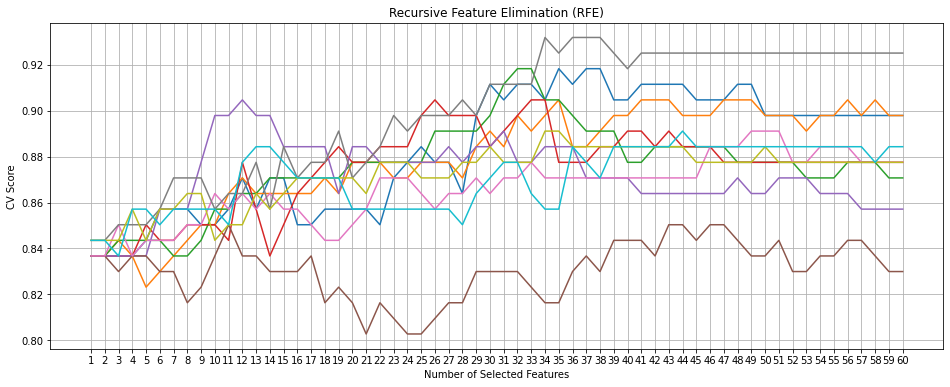

The optimal number of features: 32


In [47]:
plt.figure(figsize=(16, 6))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [48]:
#Saving dataframe with optimal features
X_rfe = X.iloc[:, rfecv.support_]

#Overview of the optimal features in comparison with the intial dataframe
print("\"X\" dimension: {}".format(X.shape))
print("\"X\" column list:", X.columns.tolist())
print("\"X_rfe\" dimension: {}".format(X_rfe.shape))
print("\"X_rfe\" column list:", X_rfe.columns.tolist())

"X" dimension: (1470, 60)
"X" column list: ['Age', 'DailyRate', 'DistanceFromHome', 'Gender', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'Education_Bellow_College', 'Education_College', 'Education_Doctor', 'Education_Master', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'EnvironmentSatisfaction_Low', 'EnvironmentSatisfaction_Medium', 'EnvironmentSatisfaction_Very_High', 'JobInvolvement_Low', 'JobInvolvement_Medium', 'JobInvolvement_Very_High', 'JobLevel_Junior', 'JobLevel_Manager', 'JobLevel_Mid', 'JobLevel_Senior', 'JobRole_Human Resources', 'JobRole_La

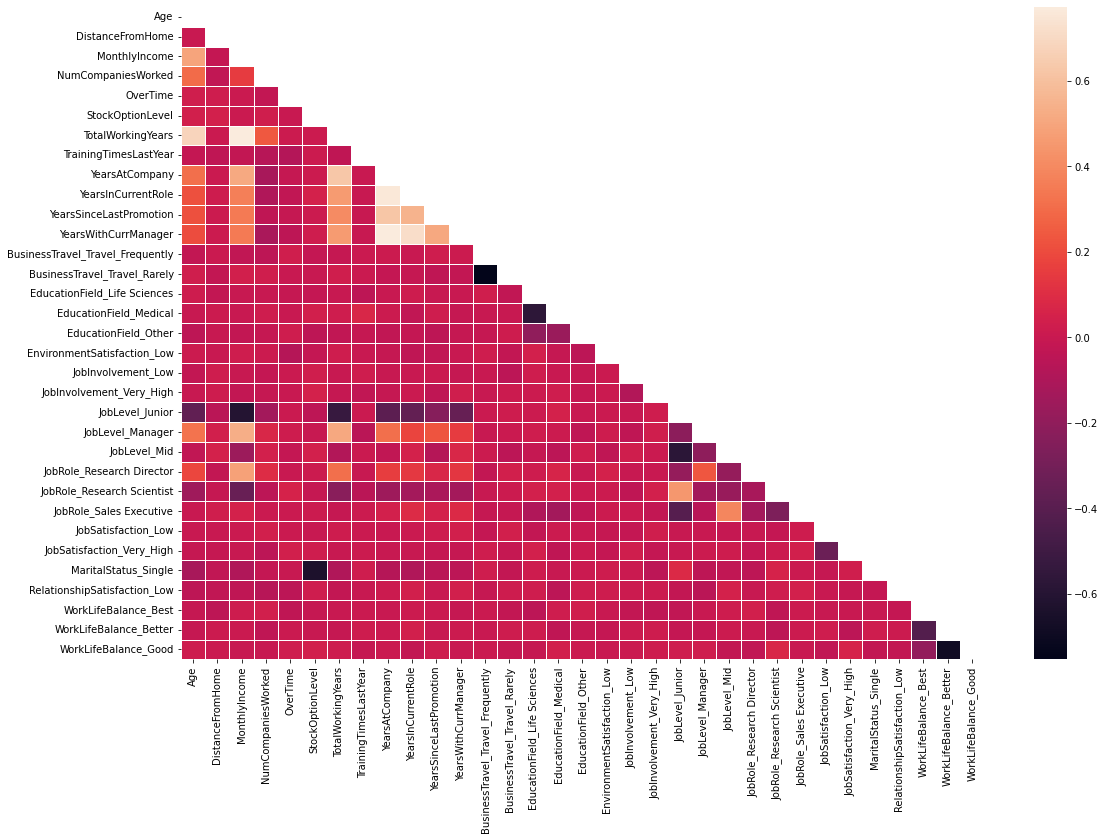

In [31]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = X_rfe.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, fmt = '.2g', linewidth = 1)
plt.show()

In [24]:
corr_matrix = data_df.corr()
sorted_mat = corr_matrix['Attrition'].sort_values(ascending = False)
#sorted_mat = corr_mat.unstack().sort_values()
sorted_mat

Attrition                       1.000000
OverTime                        0.246118
JobLevel_Junior                 0.212551
MaritalStatus_Single            0.175419
JobRole_Sales Representative    0.157234
                                  ...   
YearsWithCurrManager           -0.156199
Age                            -0.159205
MonthlyIncome                  -0.159840
YearsInCurrentRole             -0.160545
TotalWorkingYears              -0.171063
Name: Attrition, Length: 61, dtype: float64

In [38]:
# Splitting data with optimal features
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=50)  

In [26]:
# Running logistic regression model
# log_model = modeling(LogisticRegression, 'Logistic Regression Classification')

In [27]:
### Trying other machine learning algorithms: SVC
#svc_model = modeling(SVC, 'SVC Classification')

In [28]:
#Random forest
#rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

In [29]:
#Decision tree
#dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

In [30]:
#Naive bayes 
#nb_model = modeling(GaussianNB, "Naive Bayes Classification")
#vc_test_acc = accuracy_score(y_test, y_pred)

In [43]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)
log_acc = accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1 Score:",metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:",metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.8843537414965986
Precision: 0.717391304347826
Recall: 0.4647887323943662
f1 Score: 0.5641025641025642
Confusion Matrix: [[357  13]
 [ 38  33]]


In [32]:
# instantiate the model (using the default parameters)
svc = SVC()

# fit the model with data
svc.fit(X_train,y_train)

#
y_pred=svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Confusion Matrix:",metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.873015873015873
Precision: 0.9411764705882353
Recall: 0.22535211267605634
Confusion Matrix: [[369   1]
 [ 55  16]]


In [33]:
# instantiate the model (using the default parameters)
rfc = RandomForestClassifier()

# fit the model with data
rfc.fit(X_train,y_train)

#
y_pred=rfc.predict(X_test)
frc_acc = accuracy_score(y_test, y_pred)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Confusion Matrix:",metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.8594104308390023
Precision: 0.8461538461538461
Recall: 0.15492957746478872
Confusion Matrix: [[368   2]
 [ 60  11]]


In [34]:
# instantiate the model (using the default parameters)
dtc = DecisionTreeClassifier()

# fit the model with data
dtc.fit(X_train,y_train)

#
y_pred=dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, y_pred)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Confusion Matrix:",metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.7936507936507936
Precision: 0.3484848484848485
Recall: 0.323943661971831
Confusion Matrix: [[327  43]
 [ 48  23]]


In [35]:
# instantiate the model (using the default parameters)
gnb = GaussianNB()

# fit the model with data
gnb.fit(X_train,y_train)

#
y_pred=gnb.predict(X_test)
gnb_acc = accuracy_score(y_test, y_pred)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Confusion Matrix:",metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.6938775510204082
Precision: 0.3202247191011236
Recall: 0.8028169014084507
Confusion Matrix: [[249 121]
 [ 14  57]]


In [49]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Support Vector Classification', 'Random Forest Classifier', 'Decision Tree Classifier', 'Gaussian Naive Bayes'],
    'Score' : [log_acc, svc_acc, frc_acc, dtc_acc, gnb_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,0.884354
1,Support Vector Classification,0.873016
2,Random Forest Classifier,0.859410
3,Decision Tree Classifier,0.793651
4,Gaussian Naive Bayes,0.693878


In [52]:
def highlight_max(s):
    if s.dtype == np.object:
        is_max = [False for _ in range(s.shape[0])]
    else:
        is_max = s == s.max()
    return ['background: red' if cell else '' for cell in is_max]
  
models.style.apply(highlight_max)

C:\Users\Sisira\AppData\Local\Temp\ipykernel_14304\2535629472.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if s.dtype == np.object:


,Model,Score
0,Logistic Regression,0.884354
1,Support Vector Classification,0.873016
2,Random Forest Classifier,0.859410
3,Decision Tree Classifier,0.793651
4,Gaussian Naive Bayes,0.693878


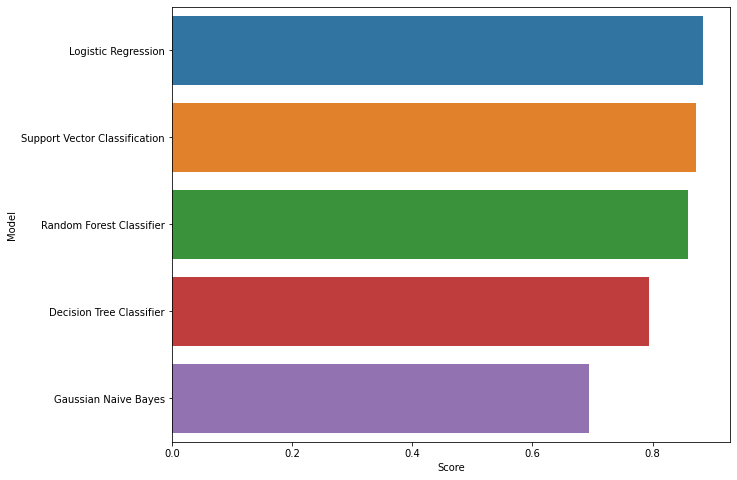

In [37]:
plt.figure(figsize = (10, 8))

sns.barplot(x = 'Score', y = 'Model', data = models)
plt.show()

In [38]:
## Improve best model by hyperparameter tuning
# define model
model = LogisticRegression()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 1000)

# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X_rfe, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8861678004535148
Best Hyperparameters: {'C': 3.930619366023564, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\Sisira\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
7080 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1590 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sisira\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sisira\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Sisira\AppData\Roaming\Python\Python310\site-packages\sk

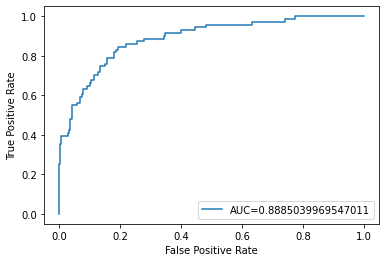

In [39]:
#fit the model using the training data
model.fit(X_train,y_train)

#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [40]:
params = result.best_params_
params

{'C': 3.930619366023564, 'penalty': 'l2', 'solver': 'liblinear'}

In [41]:
#Improving the Logistic Regression model
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)
log_acc = accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1 Score:",metrics.f1_score(y_test, y_pred))
print("Confusion Matrix:",metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.8843537414965986
Precision: 0.7777777777777778
Recall: 0.39436619718309857
f1 Score: 0.5233644859813084
Confusion Matrix: [[362   8]
 [ 43  28]]


In [42]:
#Sava the model to disk
#filename = 'model.sav'
#joblib.dump(log_model, filename)

In [43]:
#pipe.fit(X_train, y_train)
#pipe.score(X_test, y_test)

In [44]:
#fit the model using the training data
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.8843537414965986

In [45]:
import pickle
#Sava the model to disk
out_file = 'model.pkl'

with open(out_file, 'wb') as out:
    pickle.dump(model, out)

In [46]:
with open(out_file, 'rb') as fp:
    model_test = pickle.load(fp)
model_test.score(X_test, y_test)

0.8843537414965986